In [ ]:
!nvidia-smi

Tue Aug  9 21:32:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN Dataset/StrawberryLeaf.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!pip install -q keras

In [ ]:
####### Import all necessity function for Deep Learning ########
import os
import cv2
import random 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout, Conv2D, MaxPool2D, MaxPool3D, Flatten
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam




In [ ]:
directory = '/content/StrawberryLeaf'

#now we want to extract the cat and dog folder

data = []
categories = ['Strawberry___Leaf_scorch', 'Strawberry___healthy']

for i in categories:
    
    folder_path = os.path.join(directory,i)
    
    for image in os.listdir(folder_path):
        label = categories.index(i)
        filepath_ = os.path.join(folder_path, image)
        img_arr_  = cv2.imread(filepath_)
        img_arr_  = cv2.resize(img_arr_, (100,100))
        data.append([img_arr_, label])


random.shuffle(data)

In [ ]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

X = X/255

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = (X.shape[1:])))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))



model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
X.shape[1:]

(100, 100, 3)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20
37/37 [==============================] - 3s 33ms/step - loss: 0.3911 - accuracy: 0.7971 - val_loss: 0.1094 - val_accuracy: 0.9770
Epoch 2/20
37/37 [==============================] - 1s 24ms/step - loss: 0.1160 - accuracy: 0.9599 - val_loss: 0.0653 - val_accuracy: 0.9719
Epoch 3/20
37/37 [==============================] - 1s 23ms/step - loss: 0.1972 - accuracy: 0.9292 - val_loss: 0.1302 - val_accuracy: 0.9872
Epoch 4/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0603 - accuracy: 0.9881 - val_loss: 0.0515 - val_accuracy: 0.9694
Epoch 5/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0358 - accuracy: 0.9872 - val_loss: 0.0118 - val_accuracy: 0.9974
Epoch 6/20
37/37 [==============================] - 1s 24ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0113 - val_accuracy: 0.9974
Epoch 7/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0665 - accuracy: 0.9787 - val_loss: 0.0185 - val_accuracy: 0.9974
Epoch 8/20
37

Implementing LeNet Architecture


In [ ]:
# model = Sequential()
# model.add(Conv2D(filters = 6, kernel_size = (5,5), strides = 1, activation = 'relu', input_shape = (X.shape[1:])))
# model.add(MaxPool2D(pool_size = (2,2), strides = 2))

# model.add(Conv2D(filters = 16, kernel_size = (5,5), strides = 1, activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2), strides = 2))

# model.add(Flatten())
# #this is my ANN or fully connected layer
# model.add(Dense(120, activation = 'relu', kernel_initializer = 'he_normal'))
# model.add(Dense(84, activation = 'relu', kernel_initializer = 'he_normal'))
# #this is my output layer
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
# model.fit(x = X, y = y, batch_size = 60, epochs = 20, validation_split = 0.20)

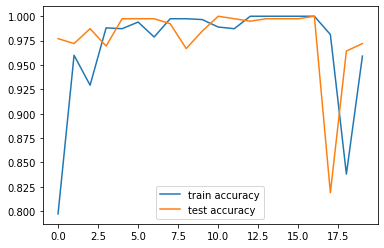

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

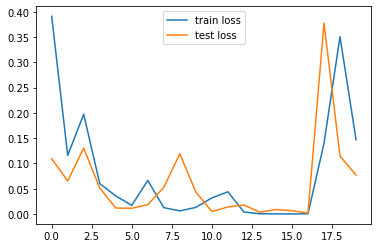

In [ ]:
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)
print("accuracy is  = ", accuracy_score(y_test, predicted_))
print("recall   is  = ", recall_score(y_test, predicted_))
print("precision is = ", precision_score(y_test, predicted_))
print("f1_score is  = ", f1_score(y_test, predicted_))

accuracy is  =  0.9719387755102041
recall   is  =  1.0
precision is =  0.9133858267716536
f1_score is  =  0.9547325102880658


In [ ]:
classification_report(predicted_, y_test)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       265\n           1       1.00      0.91      0.95       127\n\n    accuracy                           0.97       392\n   macro avg       0.98      0.96      0.97       392\nweighted avg       0.97      0.97      0.97       392\n'